In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import utils

from importlib import reload
reload(utils)

<module 'utils' from '/usr/local/google/home/raulramos/projects/text-embeddings-benchmark/utils.py'>

In [3]:
# clone repo https://github.com/amazon-science/esci-data
# previously install git-lfs to download the data files when cloning

ESCI_DATASET_ROOT = '/usr/local/google/home/raulramos/projects/esci-data'

In [4]:
# load ground truth
dgt = utils.load_examples(ESCI_DATASET_ROOT=ESCI_DATASET_ROOT, locale='es')

## model results for locale `es`

In [25]:
model = 'gemini'
locale = 'es'

In [5]:
br = utils.get_model_ranking(f'{model}/embeddings_dotp_ranking_{locale}.csv', dgt)
br.shape

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15180/15180 [00:15<00:00, 991.85it/s]


(607200, 16)

In [6]:
prods = np.unique(br.product_id.values)
len(prods)


185904

In [7]:
print(f'number of queries: {len(np.unique(br.query_id))}')

number of queries: 15180


In [8]:
df_dcg, ndgc = utils.compute_ndcg(br)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15180/15180 [00:49<00:00, 307.95it/s]


In [9]:
print (f'mean ndgc {ndgc.ndgc.mean():.4f}')
ndgc

mean ndgc 0.6664


,dgc,idgc,ndgc
query_id,,,
3,0.000000,0.000000,NaN
4,37.219244,41.921903,0.887823
31,42.502899,46.269155,0.918601
110,31.284197,33.809115,0.925318
130,3.640957,5.770780,0.630930
...,...,...,...
115942,0.000000,0.000000,NaN
115943,4.991860,14.782467,0.337688
115944,18.942539,23.501607,0.806010


In [16]:
print (f'mean ndgc {ndgc.ndgc.mean():.4f}')
ndgc

mean ndgc 0.6844


,dgc,idgc,ndgc
query_id,,,
3,0.000000,0.000000,NaN
31,48.029384,51.081955,0.940242
130,5.770780,5.770780,1.000000
155,1.313835,5.770780,0.227670
168,16.837598,17.722066,0.950092
...,...,...,...
115941,19.268778,26.607709,0.724180
115942,3.922285,13.439784,0.291841
115944,23.334342,26.900467,0.867433


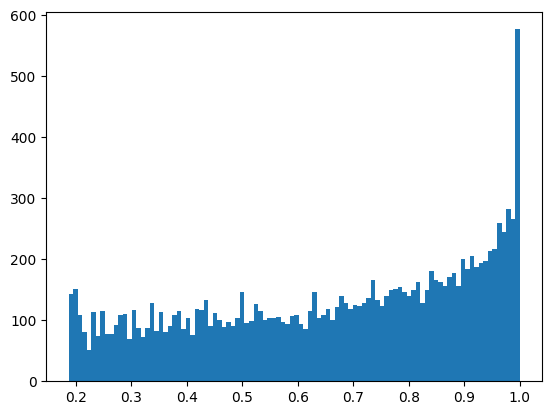

In [10]:
import matplotlib.pyplot as plt
plt.hist(ndgc.ndgc, bins=100);

## inspect random query

In [34]:
p = pd.read_parquet(f'{model}/products-{locale}.parquet')
q = pd.read_parquet(f'{model}/queries-{locale}.parquet')

In [60]:
# inspect random query

#qid = np.random.choice(np.unique(df_dcg.query_id.values))
qid = np.random.choice(ndgc[ndgc.ndgc<.3].index)
print (ndgc.loc[qid])
bq = df_dcg[df_dcg.query_id==qid]
#bq[['query_id', 'query', 'product_id', 'relevance', 'model_rank', 'ideal_rank', 'dgc', 'idgc','product_title']].iloc[:15]
q.loc[qid].query

dgc     2.396826
idgc    9.411737
ndgc    0.254663
Name: 9541, dtype: float64


'aparato corrientes fisioterapia'

In [61]:
for i in range(len(bq)):
    pi = p.loc[bq.iloc[i].product_id]
    print (pi.name, ('*' if not pd.isna(bq.iloc[i].dgc) else ' '), (pi['product'].replace('\n',' '))[:100])

B08SCFNHQ5   <TITLE>Instrumento de fisioterapia, dispositivo de terapia de ondas de choque profesional ED Disposi
B08H23JXZN   <TITLE>Instrumento de terapia de ondas de choque extracorpóreo, Máquina de masaje muscular de tejido
B093QD9B2Z   <TITLE>Masajeador de ondas de choque ZJchao para aliviar el dolor Máquina de terapia de ondas de cho
B08X22TJN9   <TITLE>Instrumento de fisioterapia de ondas de choque ED, máquina de terapia de masajeador de alivio
B08BHY62CJ   <TITLE>Máquina de terapia de ondas de choque, tratamiento de alivio del dolor, máquina de terapia po
B082DHLXGP   <TITLE>Máquina extracorpórea de terapia de ondas de choque, fisioterapia de tejidos profundos ED Dis
B08X4L3DFK   <TITLE>Instrumento de fisioterapia de ondas de choque, dispositivo de terapia de ondas de choque ext
B087RLCSVZ   <TITLE>Máquina de Terapia de Ondas de Choque Extracorpórea Electromagnética Masajeador Muscular para
B08SVN78H2   <TITLE>Máquina de terapia de ondas de choque, Instrumento de fisioterapia d